In [2]:
%load_ext autoreload
%autoreload
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import os

from record_data import Landmark

In [4]:
# CONSTANTS
DATASET_PATH = "./landmarks_pose_data"
LANDMARK_COORDS_SIZE = 21
SEED = 16
TARGET_CLASSES_NAMES = ["fist", "open_hand", "peace_hand", "point_hand", "prosper_hand"]

In [5]:
def load_data(root_path):
    class_files = os.listdir(root_path)
    frames = []
    columns = ["_x", "_y", "_z"] * LANDMARK_COORDS_SIZE
    columns = [str(idx // 3) + col for idx, col in enumerate(columns)]
    columns.append("target")

    for class_idx, class_file in enumerate(class_files):
        with open(os.path.join(root_path, class_file), "rb") as file:
            data = pickle.load(file)
            for landmarks in data:
                features = []
                for idx, landmark in enumerate(landmarks):
                    features.extend([landmark.x, landmark.y, landmark.z])
                features.append(class_idx)
                frames.append(features)
    
    df = pd.DataFrame(frames, columns=columns)
    return df

In [6]:
df = load_data(DATASET_PATH)
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0_x     4944 non-null   float64
 1   0_y     4944 non-null   float64
 2   0_z     4944 non-null   float64
 3   1_x     4944 non-null   float64
 4   1_y     4944 non-null   float64
 5   1_z     4944 non-null   float64
 6   2_x     4944 non-null   float64
 7   2_y     4944 non-null   float64
 8   2_z     4944 non-null   float64
 9   3_x     4944 non-null   float64
 10  3_y     4944 non-null   float64
 11  3_z     4944 non-null   float64
 12  4_x     4944 non-null   float64
 13  4_y     4944 non-null   float64
 14  4_z     4944 non-null   float64
 15  5_x     4944 non-null   float64
 16  5_y     4944 non-null   float64
 17  5_z     4944 non-null   float64
 18  6_x     4944 non-null   float64
 19  6_y     4944 non-null   float64
 20  6_z     4944 non-null   float64
 21  7_x     4944 non-null   float64
 22  

In [7]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [8]:
model_logreg = LogisticRegression(solver='liblinear', random_state=0)
model_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [9]:
print('Training set score: {:.4f}'.format(model_logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model_logreg.score(X_test, y_test)))

Training set score: 0.9621
Test set score: 0.9666


[Text(104.09375, 0.5, 'Predicted'), Text(0.5, 68.09375, 'Actual')]

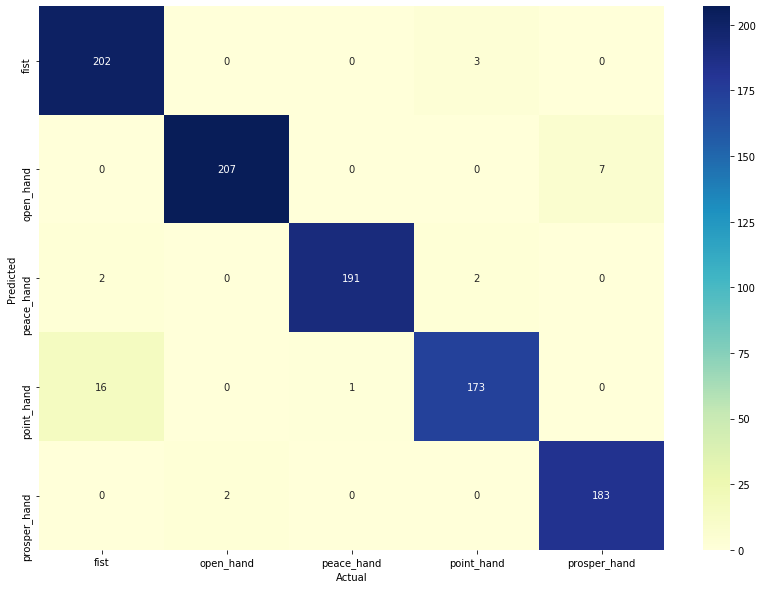

In [10]:
columns = X.columns

# Confusion Matrix
y_pred_test = model_logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(
    data=cm, 
    columns=TARGET_CLASSES_NAMES, 
    index=TARGET_CLASSES_NAMES
)

plt.figure(figsize = (14,10))
ax = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
ax.set(xlabel="Actual", ylabel="Predicted")

C:\Users\Tudor\miniconda3\envs\torch\lib\site-packages\yellowbrick\classifier\base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


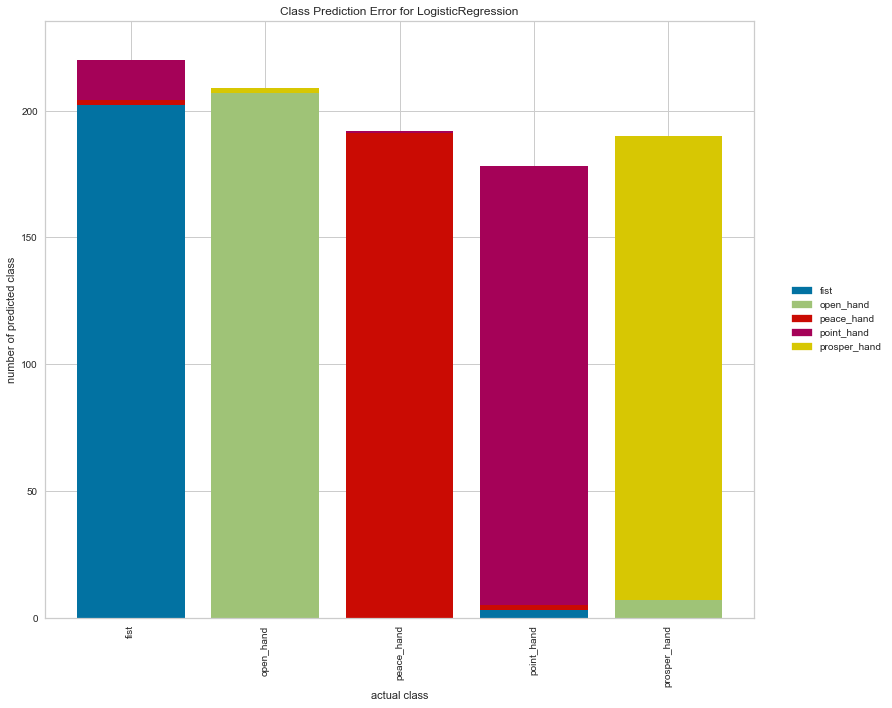

In [11]:
# Class Predicition Error
from yellowbrick.classifier  import ClassPredictionError

visualizer = ClassPredictionError(
    model_logreg, classes=TARGET_CLASSES_NAMES, is_fitted=True
)
plt.figure(figsize = (14,10))
visualizer.score(X_test, y_test)
visualizer.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       205
           1       0.99      0.99      0.99       214
           2       0.99      0.98      0.99       195
           3       0.98      0.98      0.98       190
           4       0.98      0.99      0.99       185

    accuracy                           0.99       989
   macro avg       0.99      0.99      0.99       989
weighted avg       0.99      0.99      0.99       989



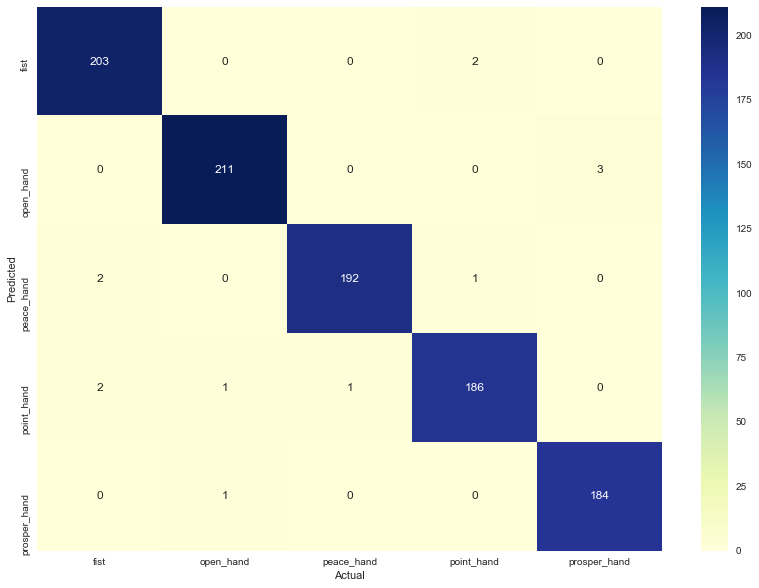

In [12]:
# RANDOM FOREST CLASSIFIER
model_random_forests = RandomForestClassifier()
model_random_forests.fit(X_train, y_train)

y_pred_test = model_random_forests.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(
    data=cm, 
    columns=TARGET_CLASSES_NAMES, 
    index=TARGET_CLASSES_NAMES
)

plt.figure(figsize = (14,10))
ax = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
ax.set(xlabel="Actual", ylabel="Predicted")

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96       205
           1       0.98      0.89      0.93       214
           2       0.99      0.98      0.98       195
           3       0.98      0.93      0.96       190
           4       0.89      0.98      0.93       185

    accuracy                           0.95       989
   macro avg       0.96      0.95      0.95       989
weighted avg       0.96      0.95      0.95       989



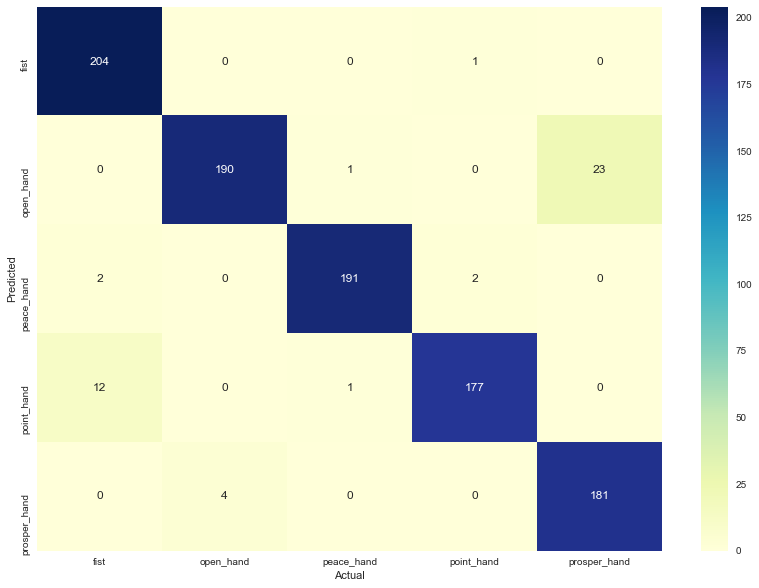

In [13]:
# SUPPORT VECTOR CLASSIFIER
model_svc = svm.SVC()
model_svc.fit(X_train, y_train)

y_pred_test = model_svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(
    data=cm, 
    columns=TARGET_CLASSES_NAMES, 
    index=TARGET_CLASSES_NAMES
)

plt.figure(figsize = (14,10))
ax = sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
ax.set(xlabel="Actual", ylabel="Predicted")

print(classification_report(y_test, y_pred_test))

In [14]:
# save the model to disk
filename = 'random_forest_classifier.pkl'
pickle.dump(model_random_forests, open(filename, 'wb'))

In [17]:
import optuna

best_model = None
best_score = 0
model_type = None

def objective(trial):
    x, y = X_train, y_train

    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
        classifier_obj = svm.SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=10
        )

    # score = cross_val_score(classifier_obj, X_test, y_test, n_jobs=-1, cv=3)
    # accuracy = score.mean()
    
    classifier_obj.fit(X_train, y_train)
    y_pred_test = model_random_forests.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)

    global best_model
    global best_score
    global model_type

    if accuracy > best_score:
        best_score = accuracy
        best_model = classifier_obj
        model_type = classifier_name

    return accuracy

In [18]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

filename = f'{model_type}.pkl'
pickle.dump(best_model, open(filename, 'wb'))

[I 2021-07-12 00:01:19,551] A new study created in memory with name: no-name-8941c5a3-c08f-424f-81f9-87721c8ba405
[I 2021-07-12 00:01:21,325] Trial 0 finished with value: 0.9868554095045501 and parameters: {'classifier': 'SVC', 'svc_c': 0.0006078334318442571}. Best is trial 0 with value: 0.9868554095045501.
[I 2021-07-12 00:01:21,444] Trial 1 finished with value: 0.9868554095045501 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 6}. Best is trial 0 with value: 0.9868554095045501.
[I 2021-07-12 00:01:21,675] Trial 2 finished with value: 0.9868554095045501 and parameters: {'classifier': 'SVC', 'svc_c': 520473.11280149285}. Best is trial 0 with value: 0.9868554095045501.
[I 2021-07-12 00:01:23,434] Trial 3 finished with value: 0.9868554095045501 and parameters: {'classifier': 'SVC', 'svc_c': 6.680112974565611e-06}. Best is trial 0 with value: 0.9868554095045501.
[I 2021-07-12 00:01:23,512] Trial 4 finished with value: 0.9868554095045501 and parameters: {'classifier': 'Rando

FrozenTrial(number=0, values=[0.9868554095045501], datetime_start=datetime.datetime(2021, 7, 12, 0, 1, 19, 553260), datetime_complete=datetime.datetime(2021, 7, 12, 0, 1, 21, 325014), params={'classifier': 'SVC', 'svc_c': 0.0006078334318442571}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'RandomForest')), 'svc_c': LogUniformDistribution(high=10000000000.0, low=1e-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)


In [19]:
print(best_score)

0.9868554095045501
